<a href="https://colab.research.google.com/github/leeCodingStudio/Python_machine_learning/blob/master/14_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_%EB%85%BC%EB%A6%AC_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 단항 논리 회귀 실습
* 논리 회귀(Logistic Regression)
* 분류를 할 때 사용하며 선형 회귀 공식으로부터 나왔기 때문에 논리 회귀라는 이름이 붙여짐

![](https://i.imgur.com/nE29yVL.png)
> 직선 하나(선형 회귀)를 사용해서 예측한다면 제대로 예측할 수 없음

![](https://i.imgur.com/guvMfkf.png)
> Sigmoid 함수(Logistic 함수)를 사용하여 정확도를 높임

### Sigmoid 함수
- 예측값을 0에서 1사이 값이 되도록 만듬
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5를 기준으로 구분

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(10)

In [2]:
x_train = torch.FloatTensor([[0], [1], [3], [5], [9], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]])

print(x_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


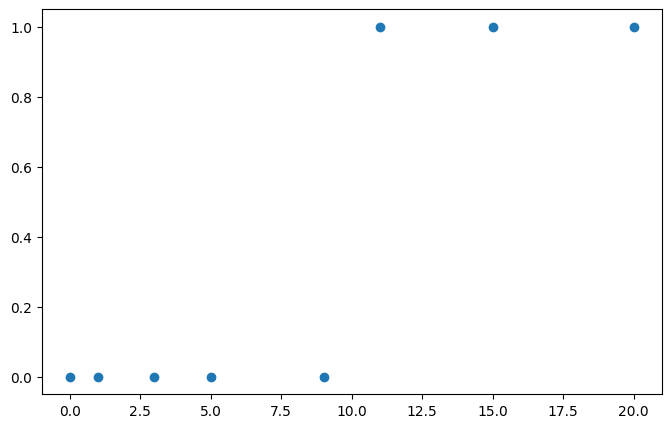

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [4]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [5]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


### 비용 함수
* 논리 회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy

<img src="https://i.imgur.com/tvCuEmh.png" width="600px">

In [6]:
y_pred = model(x_train)
y_pred

tensor([[0.4914],
        [0.4705],
        [0.4290],
        [0.3885],
        [0.3124],
        [0.2776],
        [0.2156],
        [0.1530]], grad_fn=<SigmoidBackward0>)

In [7]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.9290, grad_fn=<BinaryCrossEntropyBackward0>)

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 0.929007
Epoch 100/100 Loss: 0.568484
Epoch 200/200 Loss: 0.519625
Epoch 300/300 Loss: 0.479047
Epoch 400/400 Loss: 0.445106
Epoch 500/500 Loss: 0.416481
Epoch 600/600 Loss: 0.392129
Epoch 700/700 Loss: 0.371230
Epoch 800/800 Loss: 0.353142
Epoch 900/900 Loss: 0.337362
Epoch 1000/1000 Loss: 0.323490


In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2162]], requires_grad=True), Parameter containing:
tensor([-1.7147], requires_grad=True)]


In [11]:
x_test = torch.FloatTensor([[2.5], [15.5]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.2361],
        [0.8371]], grad_fn=<SigmoidBackward0>)


In [12]:
# 임계치 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[0.],
        [1.]])


# 2. 다항 논리 회귀 실습

In [13]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [14]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [15]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.1358,  1.5655, -0.0104],
        [-1.0986,  1.3559,  0.5590],
        [-1.4625,  1.2105,  0.7214],
        [-2.3103,  1.4702,  1.2348],
        [-1.0576,  3.7047,  0.7548],
        [-1.7209,  1.1885,  1.0922],
        [-1.5469,  3.1835,  1.0722],
        [-1.8061,  3.6010,  1.2775]], grad_fn=<AddmmBackward0>)


In [16]:
# 다항 논리 회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
# 소프트맥스 함수가 포함
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.7613, grad_fn=<NllLossBackward0>)


In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [18]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 1.761291
Epoch 100/100 Loss: 0.633731
Epoch 200/200 Loss: 0.550764
Epoch 300/300 Loss: 0.497095
Epoch 400/400 Loss: 0.453218
Epoch 500/500 Loss: 0.413998
Epoch 600/600 Loss: 0.377086
Epoch 700/700 Loss: 0.340971
Epoch 800/800 Loss: 0.304561
Epoch 900/900 Loss: 0.268060
Epoch 1000/1000 Loss: 0.242054


In [19]:
x_test = torch.FloatTensor([[1, 2, 5, 6]])
y_pred = model(x_test)
print(y_pred)

tensor([[-4.9985,  3.4779,  2.0804]], grad_fn=<AddmmBackward0>)


In [20]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[1.6701e-04, 8.0166e-01, 1.9817e-01]], grad_fn=<SoftmaxBackward0>)

In [21]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.80
2일 확률: 0.20


In [22]:
torch.argmax(y_prob, axis=1)

tensor([1])

# 3. 와인 품종 예측해보기
* sklearn.datasets.load_wine 데이터셋은 이탈리아의 같은 지역에서 재배된 세가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과

### 문제
* 13개의 성분을 분석하여 어떤 와인인지 맞춰보자
* 단, 트레이닝 데이터를 80%, 테스트 데이터를 20%로 하며 테스트 데이터의 0번 인덱스가 어떤 와인인지 출력하고 테스트 정확도도 출력

In [23]:
from sklearn.datasets import load_wine
import pandas as pd

In [24]:
wine = load_wine()

In [25]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [26]:
data = wine['data']
target = wine['target']
feature_names = wine['feature_names']

In [27]:
wine_df = pd.DataFrame(data, columns=feature_names)

In [28]:
wine_df['target'] = target

In [29]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [30]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

| 컬럼명                        |                                                 |
|-------------------------------|-------------------------------------------------|
| alcohol                       | 알코올                                           |
| malic_acid                    | 말산                                             |
| ash                           | 잔류 성분의 총                                   |
| alcalinity_of_ash             | 잔류 성분의                                       |
| magnesium                     | 마그네슘                                         |
| total_phenols                 | 총 페놀                                          |
| flavanoids                    | 플라보노이드                                      |
| nonflavanoid_phenols          | 비플라보노이드 페놀                              |
| proanthocyanins               | 프로안토시아닌                                    |
| color_intensity               | 색상의                                           |
| hue                           | 색상의                                           |
| od280/od315_of_diluted_wines  | 희석 와인의 OD280/OD315                          |
| proline                       | 프롤린                                           |
| target                        | 와인의 종류를 나타내는 타겟 변수 (0, 1, 2 중 하나의 값) |


In [31]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [32]:
wine_df['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('target',1),
                                                    wine_df['target'],
                                                    test_size=0.2,
                                                    random_state=10)

<ipython-input-77-8462eb85d27c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(wine_df.drop('target',1),


In [78]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([142, 13])
torch.Size([36, 13])
torch.Size([142])
torch.Size([36])


In [58]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
)


In [59]:
y_pred = model(X_train)
# print(y_pred)

In [60]:
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(97.2902, grad_fn=<NllLossBackward0>)


In [61]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [71]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(X_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 1370.339966
Epoch 100/100 Loss: 1409.452515
Epoch 200/200 Loss: 1950.767578
Epoch 300/300 Loss: 920.948792
Epoch 400/400 Loss: 2728.582275
Epoch 500/500 Loss: 1275.028198
Epoch 600/600 Loss: 3082.114258
Epoch 700/700 Loss: 2815.003906
Epoch 800/800 Loss: 3006.179443
Epoch 900/900 Loss: 1378.666138
Epoch 1000/1000 Loss: 1830.221191


# 강사님 풀이

In [91]:
from sklearn.datasets import load_wine

In [92]:
x_data, y_data = load_wine(return_X_y=True, as_frame=True)

In [93]:
x_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [94]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [95]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [96]:
from sklearn.model_selection import train_test_split

In [100]:
y_one_hot = nn.functional.one_hot(y_data, num_classes=3).float()

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_one_hot, test_size=0.2, random_state=10)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142, 3])
torch.Size([36, 13]) torch.Size([36, 3])


In [103]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_train_index = torch.argmax(y_train, axis=1)
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
        print(f'Epoch {epoch:4d}/{epoch} Loss: {loss:.6f} Accuracy: {accuracy:.2f}%')

Epoch    0/0 Loss: 21.453306 Accuracy: 35.92%
Epoch  100/100 Loss: 0.249212 Accuracy: 94.37%
Epoch  200/200 Loss: 0.156176 Accuracy: 96.48%
Epoch  300/300 Loss: 0.113995 Accuracy: 97.89%
Epoch  400/400 Loss: 0.098345 Accuracy: 97.89%
Epoch  500/500 Loss: 0.088938 Accuracy: 97.89%
Epoch  600/600 Loss: 0.081659 Accuracy: 98.59%
Epoch  700/700 Loss: 0.075659 Accuracy: 98.59%
Epoch  800/800 Loss: 0.070534 Accuracy: 98.59%
Epoch  900/900 Loss: 0.066053 Accuracy: 98.59%
Epoch 1000/1000 Loss: 0.062071 Accuracy: 98.59%


# 4. 경사 하강법의 종류

### 4-1. 배치 경사 하강법
* 가장 기본적인 경사 하강법(Vanilla Grdient Descent)
* 데이터 셋 전체를 고려하여 손실 함수를 계산
* 한 번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행
* Batch의 개수와 Iteration은 1이고 Batch size는 전체 데이터의 개수
* 파라미터 업데이트 할 때 한 번에 전체 데이터셋을 고려하기 때문에 모델 학습 시 많은 시간과 메모리가 필요하다는 단점

### 4-2. 확률적 경사 하강법
* 확률적 경사 하강법(Stochastic Gradient Descent)은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습이 진행
* 파라미터 값이 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길 수 있음

### 4-3. 미니 배치 경사 하강법
* 미니 배치 경사 하강법(Mini-Batch Gradient Descent)은 Batch size가 1도 전체 데이터 개수도 아닌 경우
* 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch size를 32, 64, 128과 같이 2의 n제곱에 해당하는 값을 사용하는게 보편적

# 5. 경사하강법 여러가지 기술들

### 5-1. 확률적 경사 하강법(SGD)
* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법

### 5-2. 모멘텀(Momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더 해줌
* 접선의 기울기에 한 시점 이전의 접선의 기울기 값을 일정한 비율 만큼 반영
* 언덕에서 공이 내려올 때 중간의 작은 웅덩이에 빠지더라도 관성의 힘으로 넘어서는 효과를 줄 수 있음

### 5-3. 아다그라드(Adagrad)
* 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
* 처음에는 크게 학습하다가 조금씩 적게 학습시킴

### 5-4. 아담(Adam)
* 모멘텀 + 아다그라드
* 지금 가장 많이 사용됨

In [104]:
y_pred = model(x_test)
y_pred[:5]

tensor([[128.0439, 131.9829, 127.0298],
        [ 72.1257,  79.8550,  72.4311],
        [138.6788, 137.1984, 132.5734],
        [ 85.0443,  92.4569,  84.4632],
        [168.8269, 163.2151, 162.5313]], grad_fn=<SliceBackward0>)

In [105]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[:5]

tensor([[1.8965e-02, 9.7416e-01, 6.8790e-03],
        [4.3932e-04, 9.9896e-01, 5.9625e-04],
        [8.1316e-01, 1.8502e-01, 1.8139e-03],
        [6.0302e-04, 9.9906e-01, 3.3725e-04],
        [9.9453e-01, 3.6347e-03, 1.8344e-03]], grad_fn=<SliceBackward0>)

In [107]:
print(f'0번 품종일 확률: {y_prob[0][0]:.2f}')
print(f'1번 품종일 확률: {y_prob[0][1]:.2f}')
print(f'2번 품종일 확률: {y_prob[0][2]:.2f}')

0번 품종일 확률: 0.02
1번 품종일 확률: 0.97
2번 품종일 확률: 0.01


In [108]:
y_pred_index = torch.argmax(y_prob, axis=1)
y_test_index = torch.argmax(y_test, axis=1)
accuracy = (y_test_index == y_pred_index).float().sum() / len(y_test) * 100

print(f'테스트 정확도는 {accuracy:.2f}% 입니다!')

테스트 정확도는 88.89% 입니다!
